In [4]:
# for inline image display inside notebook
# % matplotlib-inline
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc
import imageio
from IPython.display import display
import os
import cv2

C:\Users\kipli\miniconda3\envs\images\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Viewer requires Qt
  


In [3]:
os.listdir("images/matlab")

['.ipynb_checkpoints',
 'AT3_1m4_01.tif',
 'AT3_1m4_02.tif',
 'AT3_1m4_03.tif',
 'AT3_1m4_04.tif',
 'AT3_1m4_05.tif',
 'AT3_1m4_06.tif',
 'AT3_1m4_07.tif',
 'AT3_1m4_08.tif',
 'AT3_1m4_09.tif',
 'AT3_1m4_10.tif',
 'autumn.tif',
 'baby.jpg',
 'bag.png',
 'blobs.png',
 'board.tif',
 'cameraman.tif',
 'canoe.tif',
 'car1.jpg',
 'car2.jpg',
 'car_1.jpg',
 'car_2.jpg',
 'car_3.jpg',
 'car_4.jpg',
 'cell.tif',
 'circbw.tif',
 'circles.png',
 'circlesBrightDark.png',
 'circuit.tif',
 'coins.png',
 'coloredChips.png',
 'concordaerial.png',
 'concordorthophoto.png',
 'eight.tif',
 'eSFRTestImage.jpg',
 'fabric.png',
 'flamingos.jpg',
 'foggyroad.jpg',
 'foggysf1.jpg',
 'foggysf2.jpg',
 'foosball.jpg',
 'foosballraw.tiff',
 'football.jpg',
 'forest.tif',
 'gantrycrane.png',
 'glass.png',
 'greens.jpg',
 'hallway.jpg',
 'hands1-mask.png',
 'hands1.jpg',
 'hands2.jpg',
 'hestain.png',
 'hotcoffee.tif',
 'indiancorn.jpg',
 'kids.tif',
 'kobi.png',
 'liftingbody.png',
 'lighthouse.png',
 'llama.jpg'

### Read, Save and Display using PIL

198 135 RGB PNG <class 'PIL.PngImagePlugin.PngImageFile'>


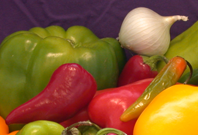

In [4]:
im = Image.open("images/matlab/onion.png")
print(im.width, im.height, im.mode, im.format, type(im))
display(im)

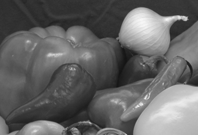

In [8]:
# converting to greyscale
im_g = im.convert("L")
im_g.save("output_images/onion.png")
display(Image.open("output_images/onion.png"))

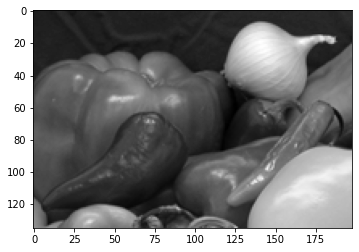

In [17]:
plt.imshow(np.array(im_g), cmap='gray')

### Read, Save, & Display using Matplotlib

(207, 346, 4) uint8 <class 'numpy.ndarray'>


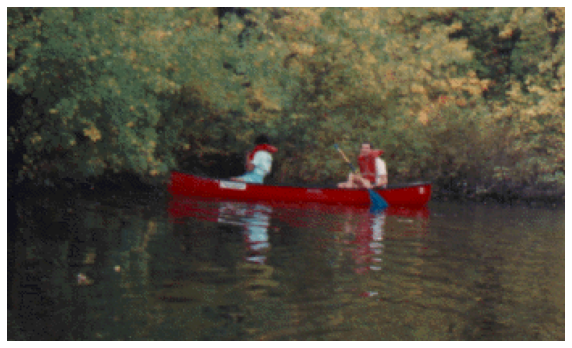

In [5]:
im = mpimg.imread("images/matlab/canoe.tif")
print(im.shape, im.dtype, type(im))
plt.figure(figsize=(10,10))
plt.imshow(im)
plt.axis('off')
plt.show()

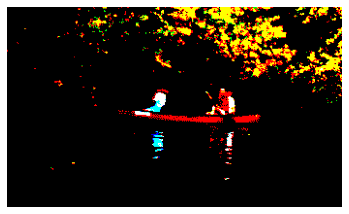

In [25]:
im1 = im
im1[im < 128] = 0
plt.imshow(im1)
plt.axis('off')
plt.savefig("output_images/canoe_dark.png")

### Interpolating

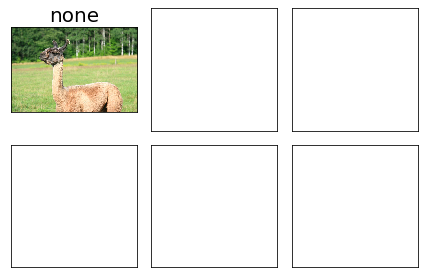

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [5]:
im = mpimg.imread("images/matlab/llama.jpg")
methods = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']
fig, axes = plt.subplots(nrows=2, ncols=3, subplot_kw={'xticks': [], 'yticks': []})
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for axis, method in zip(axes.flat, methods):
    axis.imshow(im, interpolation=method)
    axis.set_title(str(method), size=20)
    plt.tight_layout()
    plt.show()

### Read, Save, & Display using Scikit-Image

(972, 1296, 3) uint8 <class 'numpy.ndarray'>


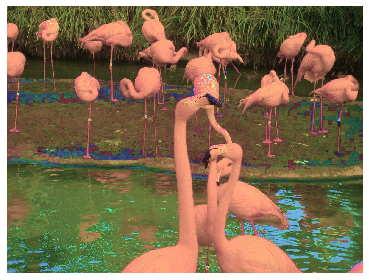

In [31]:
im = imread("images/flamingos.jpg")
print(im.shape, im.dtype, type(im))
hsv = color.rgb2hsv(im)
hsv[:,:,1] = 0.5 #change all s values to 0.5
im1 = color.hsv2rgb(hsv)
plt.axis('off')
imshow(im1)
plt.show()

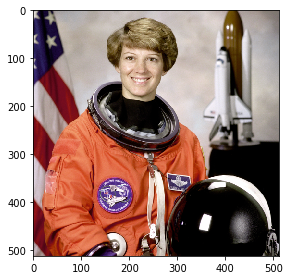

In [31]:
im = data.astronaut()
imshow(im)
show()

### Read, Save & Display Using Imageio

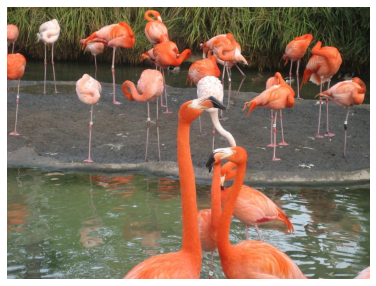

In [4]:
im = imageio.imread('images/matlab/flamingos.jpg')
plt.figure(figsize=(10,5))
plt.imshow(im)
plt.axis('off')
plt.show()
imageio.imwrite('output_images/flamingos.png', im)

### Summary: Read, Save & Display

```json
{
    PIL:
        {
            "Read": "Image.open"
            "Save": "Image.save"
            "Display": "Image.show" # not inline
        }
    Matplotlib
        {
            "Read": "image.open"
            "Save": "pyplot.savefig"
            "Display": "pyplot.imshow"
        }
    Scikit Image
        {
            "Read": "skimage.io.imread"
            "Save": "skimage.io.imsave"
            "Display": "skimage.io.imshow"
        }
    Imageio
        {
            "Read": "imageio.imread"
            "Save": "imageio.imwrite"
            "Display": "imageio.imshow"
        }
}
```

### Converting Between Colour Spaces

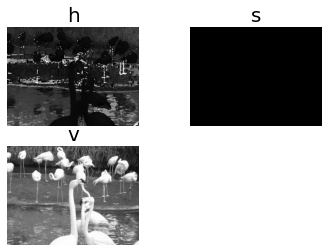

In [32]:
plt.gray()
plt.subplot(2, 2, 1), plt.imshow(hsv[:,:,0]), plt.title('h', size=20), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(hsv[:,:,1]), plt.title('s', size=20), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(hsv[:,:,2]), plt.title('v', size=20), plt.axis('off')
plt.subplot(2, 2, 1), plt.axis('off')
plt.show()

### Converting between Image & Numpy.ndarray Objects

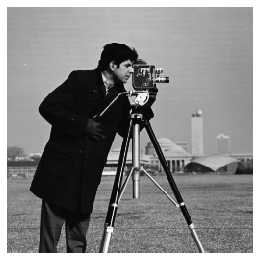

(256, 256)

In [6]:
# from Image to Numpy.ndarray
im = Image.open('images/matlab/cameraman.tif')
im = np.array(im)
imshow(im)
plt.axis('off')
show()
im.shape

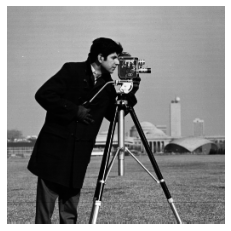

In [68]:
# from Numpy.ndarray to Image
im = imread('images/cameraman.tif')
im = Image.fromarray(im)
plt.axis('off')
plt.imshow(im)
plt.show()

##### Circular Mask

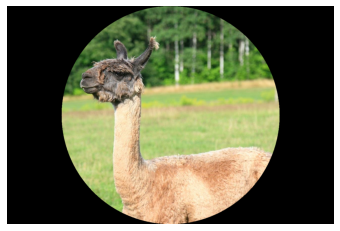

In [32]:
llama = mpimg.imread("images/llama.jpg")
lx, ly, _ = llama.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 6
llama[mask, :] = 0
plt.imshow(llama)
plt.axis('off')
plt.show()

##### Image Morphing: $\alpha$-blending of Two images

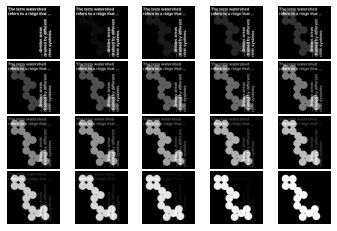

In [8]:
im1 = mpimg.imread("images/matlab/text.png")
im2 = mpimg.imread("images/matlab/circles.png")
i = 1 # a subplot variable
# plt.figure(figsize = (18, 15))
for alpha in np.linspace(0, 1, 20):
    plt.subplot(4, 5, i)
    im3 = (1 - alpha) * im1 + alpha * im2
    plt.imshow(im3, 'gray')
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace = 0.05, hspace = 0.05)
plt.show()

## Morphological Image Processing

### Binary erosion and dilation

In [52]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, rectangle, binary_dilation, disk
from skimage import img_as_float
import matplotlib.pyplot as plt

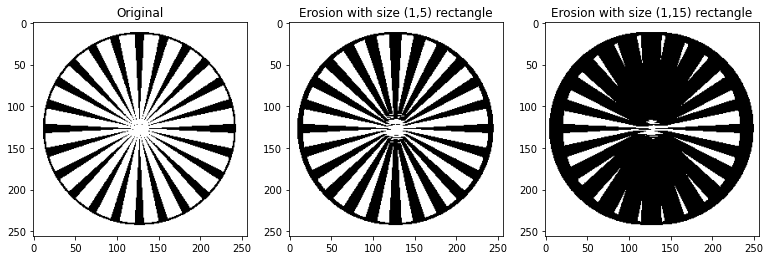

In [70]:
def plot_image(image, title=''):
    plt.title(title), plt.imshow(image, 'gray')

img = imread("images/matlab/testpat1.png", True)
img[img <= 0.5] = 0
img[img > 0.5] = 1

plt.figure(figsize=(13,5))
plt.subplot(131), plot_image(img, "Original")
img2 = binary_erosion(img, rectangle(1,5))
plt.subplot(132), plot_image(img2, "Erosion with size (1,5) rectangle")
img3 = binary_erosion(img, rectangle(1,15))
plt.subplot(133), plot_image(img3, "Erosion with size (1,15) rectangle")
plt.show()

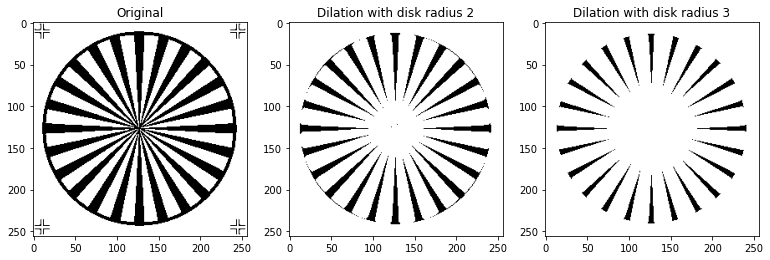

In [117]:
img = imread("images/matlab/testpat1.png", True)/255
img[img <= 0.5] = 0
img[img > 0.5] = 1

plt.figure(figsize=(13,5))
plt.subplot(131), plt.imshow(img), plt.title("Original")
for d in range(2,4):
    plt.subplot(1,3,d)
    img1 = binary_dilation(img, disk(d))
    plt.imshow(img1), plt.title("Dilation with disk radius " + str(d))
plt.show()

### Binary Opening and Closing

`Opening` removes small objects while `closing` removes small holes

In [100]:
from skimage.morphology import binary_closing, binary_opening, disk
from skimage.io import imread

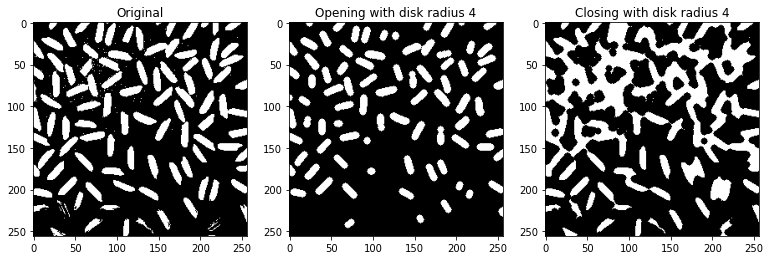

In [150]:
img = imread("images/matlab/rice.png", True)/255
img[img <= 0.5] = 0
img[img > 0.5] = 1

plt.figure(figsize=(13,5))
plt.subplot(131), plt.imshow(img), plt.title("Original")
img2 = binary_opening(img, disk(4)) # removes small objects i.e. the rice, making image blacker
plt.subplot(132), plt.imshow(img2), plt.title("Opening with disk radius 4")
img3 = binary_closing(img, disk(4)) # removes small holes i.e. the black zones, making image whiter
plt.subplot(133), plt.imshow(img3), plt.title("Closing with disk radius 4")
plt.show()

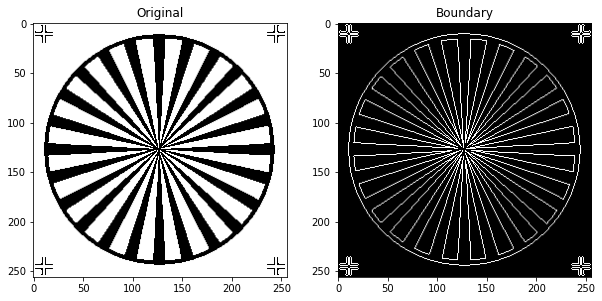

In [152]:
img = imread("images/matlab/testpat1.png", True)/255
img[img <= 0.5] = 0
img[img > 0.5] = 1

boundary = img - binary_erosion(img)
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.subplot(122), plt.imshow(boundary), plt.title("Boundary")
plt.show()

### Grayscale Erosion and Dilation

In [30]:
from skimage.morphology import dilation, erosion, opening, closing, square, disk, diamond, rectangle
from skimage.segmentation import watershed
from skimage.filters.rank import enhance_contrast
from skimage.io import imread, imsave
from skimage import exposure, feature
from skimage.filters import threshold_otsu, threshold_multiotsu, sobel
import numpy as np
import cv2

In [16]:
def plot_image(image, title=""):
    plt.imshow(image, "gray"), plt.title(title)

def plot_images(original, filtered, filter_name, size=(10,4)):
    plt.figure(figsize=size)
    plt.subplot(121), plot_image(original, "Original")
    plt.subplot(122), plot_image(filtered, filter_name)
    plt.show()

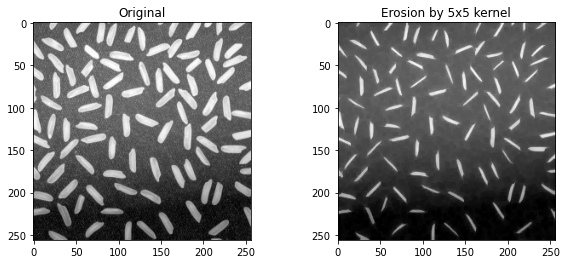

In [184]:
img = imread("images/matlab/rice.png", True)
selem = square(5)
eroded = erosion(img, selem)
plot_images(img, eroded, "Erosion by 5x5 kernel")

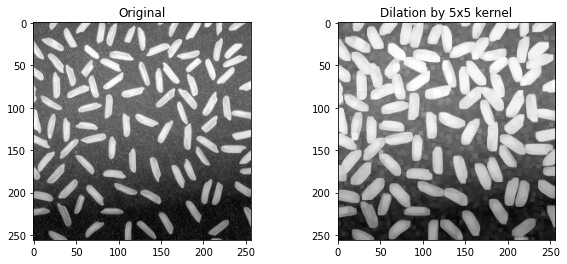

In [185]:
dilated = dilation(img, selem)
plot_images(img, dilated, "Dilation by 5x5 kernel")

### Grayscale Opening and Closing

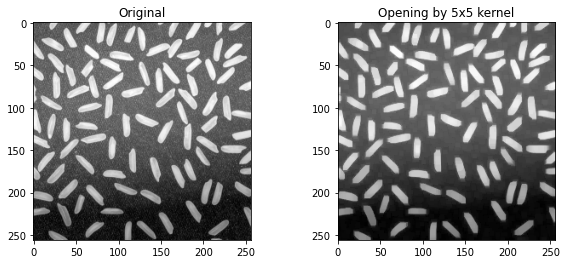

In [186]:
opened = opening(img, selem)
plot_images(img, opened, "Opening by 5x5 kernel")

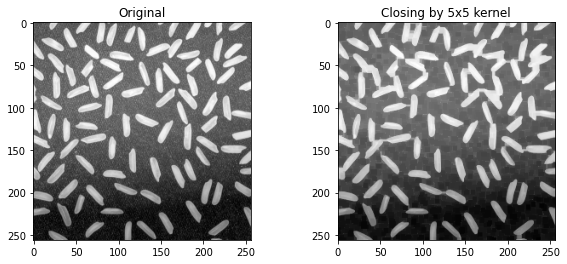

In [187]:
closed = closing(img, selem)
plot_images(img, closed, "Closing by 5x5 kernel")

### Contrast Enhancement

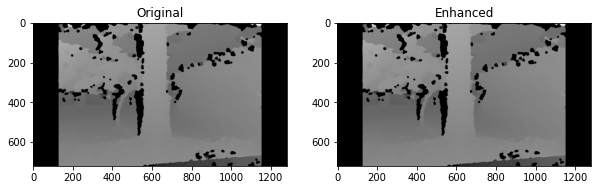

In [40]:
img = imread("depthMap.png", True)
img2 = erosion(dilation(img, disk(5)), disk(5))

selem = disk(5)
enhanced = enhance_contrast(img2, selem)
equalized = exposure.equalize_adapthist(img2, clip_limit=0.05)
plot_images(img, img2, "Enhanced")

#### Otsu's Method

0.310546875


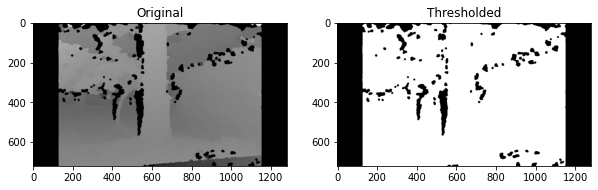

In [38]:
img = img
thresh = threshold_otsu(equalized)
print(thresh)
binary = img > thresh
plot_images(img, binary, "Thresholded")

#### Multi-Otsu

[ 58.27148438 135.96679688]


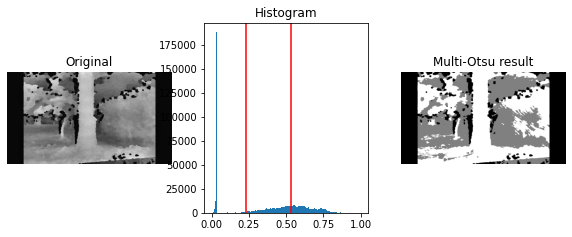

In [39]:
# img = imread("images/dispaSGBM.png", True)
thresholds = threshold_multiotsu(equalized)
print(thresholds*255)
regions = np.digitize(equalized, bins=thresholds)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

ax[0].imshow(equalized, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(equalized.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

ax[2].imshow(regions, cmap='gray')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

#### Canny Edge

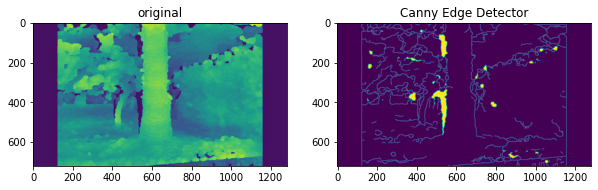

In [35]:
from scipy.ndimage import binary_fill_holes as bfh

edges = feature.canny(equalized, sigma=1)
elevation_map = sobel(equalized)

markers = np.zeros_like(equalized*255)
markers[equalized*255 < 90] = 1
markers[equalized*255 > 145] = 2

segmented = watershed(elevation_map, markers)
filled = bfh(edges)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(equalized), plt.title("original")
plt.subplot(122), plt.imshow(filled, interpolation='bilinear'), plt.title("Canny Edge Detector")
plt.show()